## Trabalho de Estatística Experimental I

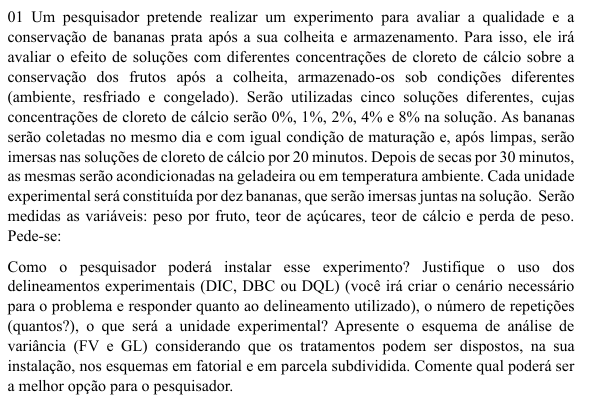

#### Esquema Fatorial com Parcelas Subdivididas
Neste experimento, as condições de armazenamento são o fator primário (A) e as concentrações de cloreto de cálcio o fator secundário (B). As unidades experimentais são compostas por 10 bananas imersas juntas na solução. Utilizamos um delineamento inteiramente casualizado (DIC) com 3 repetições para cada tratamento, garantindo boa precisão e um custo razoável.

### Hipóteses Testadas

#### Soluções:
    H0: Não há diferença entre os diferentes níveis de concentração de cloreto de cálcio.
    𝐻1: Há diferença.

#### Condições de Armazenamento:

    H0: Não há diferença entre os efeitos das diferentes condições de armazenamento.
    𝐻1: Há diferença.

#### Interação:

    H0: As concentrações de cloreto de cálcio e as condições de armazenamento atuam independentemente.
    𝐻1: Não atuam independentemente.

#### ANOVA para Esquema Fatorial com Parcelas Subdivididas:

| FV           | GL |
|--------------|----|
| A            | 2  |
| Resíduo(A)   | 6  |
| Parcelas     | 8  |
| B            | 4  |
| A*B          | 8  |
| Resíduo(B)   | 24 |
| Total        | 44 |

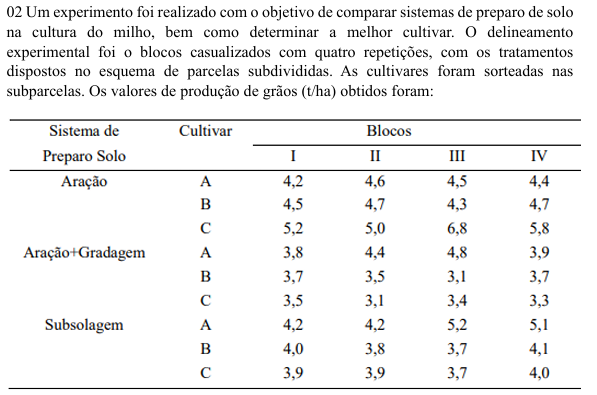

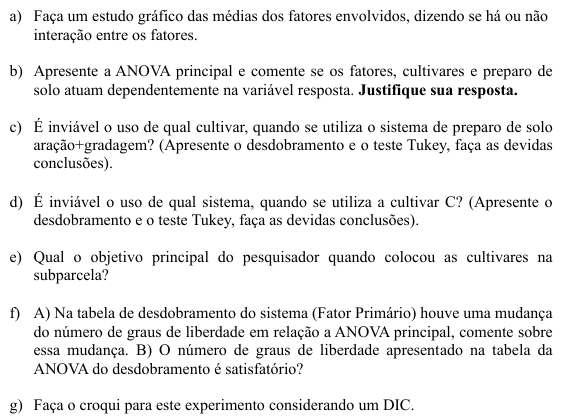

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
sistemas_preparo = ['Aração', 'Aração+Gradagem', 'Subsolagem']
cultivares = ['A', 'B', 'C']
valores = {
    'Aração': {
        'A': [4.2, 4.6, 4.5, 4.4],
        'B': [4.5, 4.7, 4.3, 4.7],
        'C': [5.2, 5.0, 6.8, 5.8],
    },
    'Aração+Gradagem': {
        'A': [3.8, 4.4, 4.8, 3.9],
        'B': [3.7, 3.5, 3.1, 3.7],
        'C': [3.5, 3.1, 3.4, 3.3],
    },
    'Subsolagem': {
        'A': [4.2, 4.2, 5.2, 5.1],
        'B': [4.0, 3.8, 3.7, 4.1],
        'C': [3.9, 3.9, 3.7, 4.0],
    },
}

In [12]:
# Calculando as médias para cada cultivar em cada sistema de preparo
medias_cultivares = {
    sistema: {cultivar: np.mean(valores[sistema][cultivar]) for cultivar in cultivares}
    for sistema in sistemas_preparo
}

In [13]:
# Calculando as médias para cada sistema de preparo em cada cultivar
medias_sistemas = {
    cultivar: {sistema: np.mean([valores[sistema][cultivar][i] for i in range(4)]) for sistema in sistemas_preparo}
    for cultivar in cultivares
}

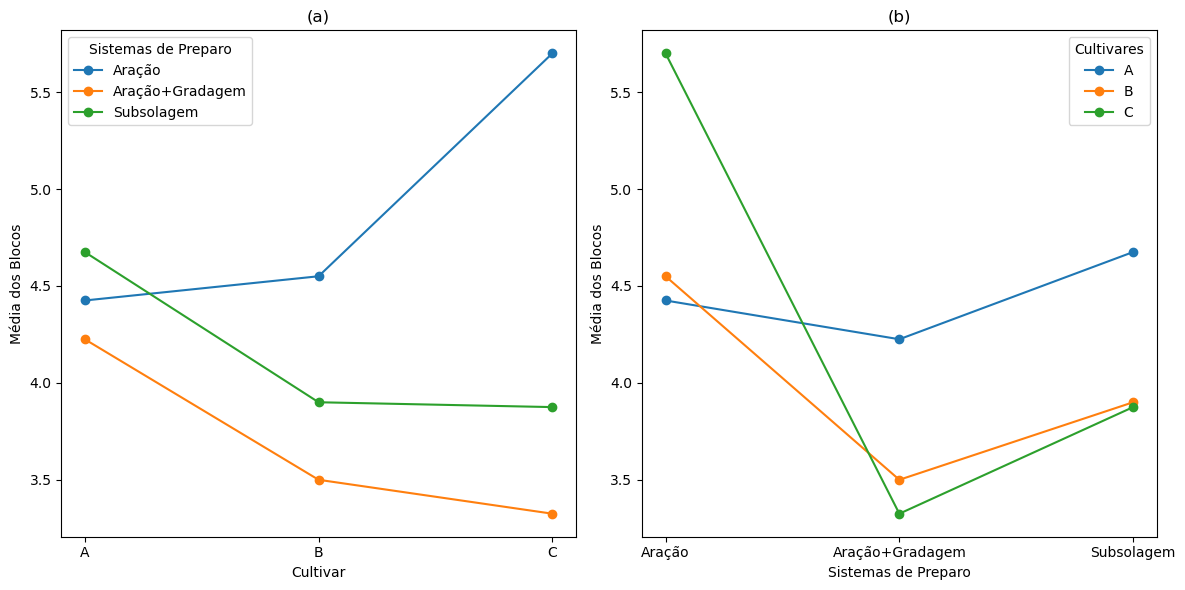

In [14]:
# Gráfico (a)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for sistema in sistemas_preparo:
    plt.plot(cultivares, list(medias_cultivares[sistema].values()), marker='o', label=sistema)
plt.xlabel('Cultivar')
plt.ylabel('Média dos Blocos')
plt.legend(title='Sistemas de Preparo')
plt.title('(a)')

# Gráfico (b)
plt.subplot(1, 2, 2)
for cultivar in cultivares:
    plt.plot(sistemas_preparo, list(medias_sistemas[cultivar].values()), marker='o', label=cultivar)
plt.xlabel('Sistemas de Preparo')
plt.ylabel('Média dos Blocos')
plt.legend(title='Cultivares')
plt.title('(b)')

plt.tight_layout()
plt.show()

ANOVA

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
# Dados da tabela
data = {
    'Sistema': ['Araçao'] * 12 + ['Araçao+Gradagem'] * 12 + ['Subsolagem'] * 12,
    'Cultivar': ['A', 'B', 'C'] * 4 * 3,
    'Bloco': ['I', 'II', 'III', 'IV'] * 9,
    'Produção': [4.2, 4.5, 5.2, 4.6, 4.7, 5.0, 4.5, 4.3, 6.8, 4.4, 4.7, 5.8,
                 3.8, 3.7, 3.5, 4.4, 3.5, 3.1, 4.8, 3.1, 3.4, 3.9, 3.7, 3.3,
                 4.2, 4.0, 3.9, 4.2, 3.8, 3.9, 5.2, 3.7, 3.7, 5.1, 4.1, 4.0]
}

In [17]:
df = pd.DataFrame(data)

In [18]:
# Ajustando o modelo
model = ols('Produção ~ C(Sistema) * C(Cultivar)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)


In [19]:
print(anova_table)

                          sum_sq    df          F        PR(>F)
C(Sistema)              8.911667   2.0  28.730149  2.058736e-07
C(Cultivar)             1.321667   2.0   4.260896  2.464508e-02
C(Sistema):C(Cultivar)  6.106667   4.0   9.843582  4.797970e-05
Residual                4.187500  27.0        NaN           NaN


Para determinar qual cultivar é inviável quando se utiliza o sistema de preparo de solo Aração+Gradagem, podemos realizar um desdobramento dos dados específicos desse sistema e aplicar o teste de Tukey para comparar as médias das cultivares. Vou primeiro extrair os dados relevantes e depois aplicar o teste de Tukey.

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [21]:
data_aracao_gradagem = {
    'Cultivar': ['A', 'B', 'C'] * 4,
    'Bloco': ['I', 'II', 'III', 'IV'] * 3,
    'Produção': [3.8, 3.7, 3.5, 4.4, 3.5, 3.1, 4.8, 3.1, 3.4, 3.9, 3.7, 3.3]
}

In [22]:
# Criando o DataFrame
df_aracao_gradagem = pd.DataFrame(data_aracao_gradagem)

# Ajustando o modelo
model_aracao_gradagem = ols('Produção ~ C(Cultivar)', data=df_aracao_gradagem).fit()
anova_table_aracao_gradagem = sm.stats.anova_lm(model_aracao_gradagem, typ=2)


In [25]:
print("ANOVA para Aração+Gradagem:")
print(anova_table_aracao_gradagem)

ANOVA para Aração+Gradagem:
               sum_sq   df         F    PR(>F)
C(Cultivar)  1.821667  2.0  8.407692  0.008722
Residual     0.975000  9.0       NaN       NaN


In [26]:
# Teste de Tukey
tukey_result = pairwise_tukeyhsd(endog=df_aracao_gradagem['Produção'], groups=df_aracao_gradagem['Cultivar'], alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   -0.725 0.0302 -1.3748 -0.0752   True
     A      C     -0.9 0.0096 -1.5498 -0.2502   True
     B      C   -0.175 0.7401 -0.8248  0.4748  False
----------------------------------------------------


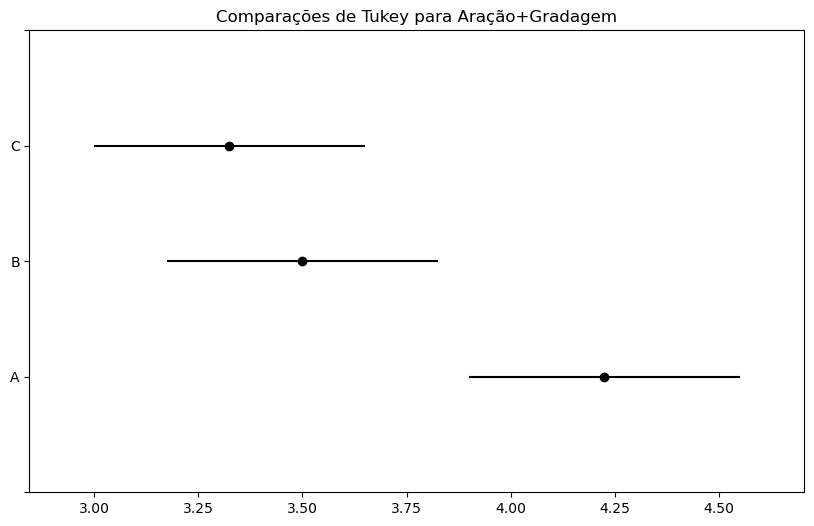

In [27]:
# Plotando os resultados do teste de Tukey
tukey_result.plot_simultaneous()
plt.title('Comparações de Tukey para Aração+Gradagem')
plt.show()

Com base nos resultados do teste de Tukey, a cultivar C é inviável quando se utiliza o sistema de preparo de solo Aração+Gradagem, pois apresenta uma produção significativamente menor comparada à cultivar A. As cultivares A e B não diferem significativamente entre si em termos de produção, indicando que ambas são viáveis para esse sistema de preparo de solo.

In [29]:
# Dados específicos para a cultivar C
data_c = {
    'Sistema': ['Aracao', 'Aracao+Gradagem', 'Subsolagem'] * 4,
    'Bloco': ['I', 'II', 'III', 'IV'] * 3,
    'Produção': [5.2, 3.5, 3.9, 5.0, 3.1, 3.9, 6.8, 3.4, 3.7, 5.8, 3.3, 4.0]
}

In [30]:
df_c = pd.DataFrame(data_c)

In [31]:
# Ajustando o modelo
model_c = ols('Produção ~ C(Sistema)', data=df_c).fit()
anova_table_c = sm.stats.anova_lm(model_c, typ=2)

In [32]:
print("ANOVA para Cultivar C:")
print(anova_table_c)

ANOVA para Cultivar C:
            sum_sq   df          F    PR(>F)
C(Sistema)  12.365  2.0  26.559666  0.000168
Residual     2.095  9.0        NaN       NaN


In [33]:
# Teste de Tukey
tukey_result_c = pairwise_tukeyhsd(endog=df_c['Produção'], groups=df_c['Sistema'], alpha=0.05)
print(tukey_result_c)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
         Aracao Aracao+Gradagem   -2.375 0.0002 -3.3275 -1.4225   True
         Aracao      Subsolagem   -1.825 0.0012 -2.7775 -0.8725   True
Aracao+Gradagem      Subsolagem     0.55 0.2898 -0.4025  1.5025  False
----------------------------------------------------------------------


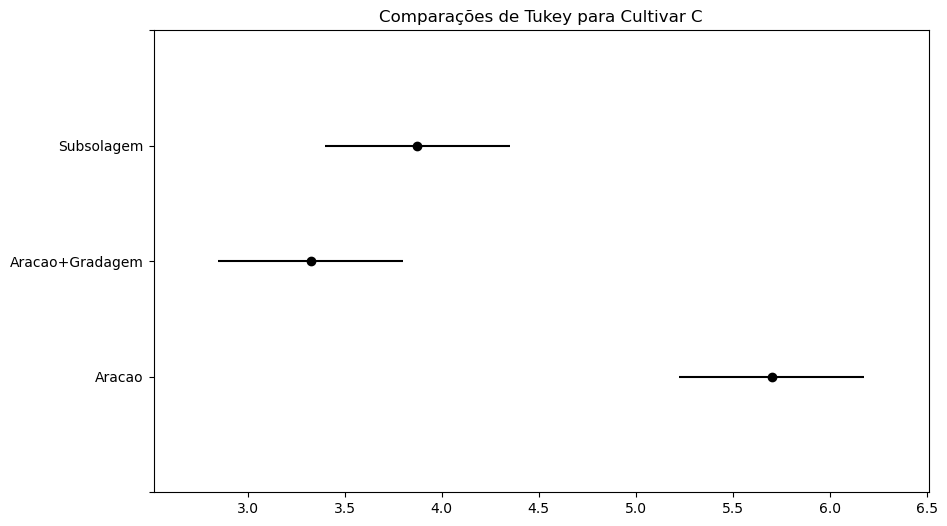

In [34]:
# Plotando os resultados do teste de Tukey
tukey_result_c.plot_simultaneous()
plt.title('Comparações de Tukey para Cultivar C')
plt.show()

Com base nos resultados do teste de Tukey, o sistema de preparo de solo "Aração+Gradagem" é inviável quando se utiliza a cultivar C, pois apresenta uma produção significativamente menor comparada aos sistemas "Aração" e "Subsolagem". A produção com "Subsolagem" também é menor que com "Aração", mas ainda é maior que com "Aração+Gradagem".

O objetivo principal do pesquisador ao colocar as cultivares na subparcela foi avaliar a interação entre os sistemas de preparo de solo e as cultivares de milho. Isso permite identificar como diferentes sistemas de preparo afetam cada cultivar, ajudando a determinar as melhores combinações para maximizar a produção de grãos.

A) Mudança nos Graus de Liberdade

No desdobramento do sistema de preparo de solo, os graus de liberdade mudam porque focamos apenas nesse fator. Isso resulta em menos graus de liberdade para o erro, redistribuindo-os apenas entre os sistemas de preparo de solo.

B) Satisfação dos Graus de Liberdade

Sim, o número de graus de liberdade no erro (6) é satisfatório para a ANOVA do desdobramento, proporcionando resultados confiáveis.

### Croqui Resumido do Experimento em DIC

| Sistema de Preparo de Solo | Bloco I | Bloco II | Bloco III | Bloco IV |
|----------------------------|---------|----------|-----------|----------|
| Aração                     | A, B, C | A, B, C  | A, B, C   | A, B, C  |
| Aração+Gradagem            | A, B, C | A, B, C  | A, B, C   | A, B, C  |
| Subsolagem                 | A, B, C | A, B, C  | A, B, C   | A, B, C  |
